In [29]:
import pandas as pd
from data_mountain_query.query import get_ambient_tweets
from data_mountain_query.connection import get_connection
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from datetime import timedelta
import plotly.express as px

In [30]:
games = pd.read_csv("/Users/elisabethkollrack/Thesis/EK-thesis/games.csv")
games = games[games['game_type'] == 'REG']
games['gameday'] = pd.to_datetime(games['gameday'], format='%m/%d/%y')

# Dallas 2013 games
dallas_games = games[
    (games['season'] == 2013) &
    ((games['home_team'] == 'DAL') | (games['away_team'] == 'DAL'))
].sort_values(['season', 'gameday'])


In [31]:
collection, client = get_connection(geotweets=True)

Connecting on mgmt1.vacc.uvm.edu


In [32]:
all_tweets = []
for index, game in dallas_games.iterrows():
    gameday = game['gameday']
    
    # Determine opponent
    if game['home_team'] == 'DAL':
        opponent = game['away_team']
    else:
        opponent = game['home_team']

    anchors = [
        "#DallasCowboys", 
        "#CowboysNation",
        f"#DALvs{opponent}",
        f"#{opponent}vsDAL"
    ]

    start_date = gameday - timedelta(days=3)
    end_date = gameday + timedelta(days=3)
    dates = pd.date_range(start_date, end_date, freq='D')

    for anchor in anchors:
        tweets_list1 = [t for t in get_ambient_tweets(anchor, dates, collection)]
        all_tweets.extend(tweets_list1)



{'$text': {'$search': '"#DallasCowboys"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-09-05 00:00:00'), '$lt': Timestamp('2013-09-11 00:00:00')}, 'fastText_lang': 'en'}


  0%|          | 0/69 [00:00<?, ?it/s]/opt/anaconda3/envs/data-mountain-query/lib/python3.9/site-packages/pymongo/synchronous/collection.py:1945: UserWarning:

use an explicit session with no_cursor_timeout=True otherwise the cursor may still timeout after 30 minutes, for more info see https://mongodb.com/docs/v4.4/reference/method/cursor.noCursorTimeout/#session-idle-timeout-overrides-nocursortimeout

100%|██████████| 69/69 [00:00<00:00, 144.25it/s]


{'$text': {'$search': '"#CowboysNation"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-09-05 00:00:00'), '$lt': Timestamp('2013-09-11 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 446/446 [00:00<00:00, 822.42it/s]


{'$text': {'$search': '"#DALvsNYG"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-09-05 00:00:00'), '$lt': Timestamp('2013-09-11 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 9/9 [00:00<00:00, 95.07it/s]


{'$text': {'$search': '"#NYGvsDAL"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-09-05 00:00:00'), '$lt': Timestamp('2013-09-11 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 81/81 [00:00<00:00, 789.34it/s]


{'$text': {'$search': '"#DallasCowboys"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-09-12 00:00:00'), '$lt': Timestamp('2013-09-18 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 22/22 [00:00<00:00, 197.69it/s]


{'$text': {'$search': '"#CowboysNation"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-09-12 00:00:00'), '$lt': Timestamp('2013-09-18 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 121/121 [00:00<00:00, 216.09it/s]


{'$text': {'$search': '"#DALvsKC"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-09-12 00:00:00'), '$lt': Timestamp('2013-09-18 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 8/8 [00:00<00:00, 85.73it/s]


{'$text': {'$search': '"#KCvsDAL"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-09-12 00:00:00'), '$lt': Timestamp('2013-09-18 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 4/4 [00:00<00:00, 42.21it/s]


{'$text': {'$search': '"#DallasCowboys"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-09-19 00:00:00'), '$lt': Timestamp('2013-09-25 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 16/16 [00:00<00:00, 142.29it/s]


{'$text': {'$search': '"#CowboysNation"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-09-19 00:00:00'), '$lt': Timestamp('2013-09-25 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 126/126 [00:00<00:00, 529.55it/s]


{'$text': {'$search': '"#DALvsSTL"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-09-19 00:00:00'), '$lt': Timestamp('2013-09-25 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 4/4 [00:00<00:00, 43.30it/s]


{'$text': {'$search': '"#STLvsDAL"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-09-19 00:00:00'), '$lt': Timestamp('2013-09-25 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 3/3 [00:00<00:00, 31.94it/s]


{'$text': {'$search': '"#DallasCowboys"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-09-26 00:00:00'), '$lt': Timestamp('2013-10-02 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 10/10 [00:00<00:00, 87.66it/s]


{'$text': {'$search': '"#CowboysNation"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-09-26 00:00:00'), '$lt': Timestamp('2013-10-02 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 132/132 [00:00<00:00, 581.14it/s]


{'$text': {'$search': '"#DALvsSD"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-09-26 00:00:00'), '$lt': Timestamp('2013-10-02 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 9/9 [00:00<00:00, 94.84it/s]


{'$text': {'$search': '"#SDvsDAL"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-09-26 00:00:00'), '$lt': Timestamp('2013-10-02 00:00:00')}, 'fastText_lang': 'en'}


0it [00:00, ?it/s]


{'$text': {'$search': '"#DallasCowboys"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-10-03 00:00:00'), '$lt': Timestamp('2013-10-09 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 23/23 [00:00<00:00, 204.46it/s]


{'$text': {'$search': '"#CowboysNation"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-10-03 00:00:00'), '$lt': Timestamp('2013-10-09 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 253/253 [00:00<00:00, 795.48it/s]


{'$text': {'$search': '"#DALvsDEN"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-10-03 00:00:00'), '$lt': Timestamp('2013-10-09 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 16/16 [00:00<00:00, 165.75it/s]


{'$text': {'$search': '"#DENvsDAL"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-10-03 00:00:00'), '$lt': Timestamp('2013-10-09 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 106/106 [00:01<00:00, 89.55it/s]


{'$text': {'$search': '"#DallasCowboys"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-10-10 00:00:00'), '$lt': Timestamp('2013-10-16 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 20/20 [00:00<00:00, 177.94it/s]


{'$text': {'$search': '"#CowboysNation"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-10-10 00:00:00'), '$lt': Timestamp('2013-10-16 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 285/285 [00:00<00:00, 388.20it/s]


{'$text': {'$search': '"#DALvsWAS"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-10-10 00:00:00'), '$lt': Timestamp('2013-10-16 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 7/7 [00:00<00:00, 70.05it/s]


{'$text': {'$search': '"#WASvsDAL"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-10-10 00:00:00'), '$lt': Timestamp('2013-10-16 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 5/5 [00:00<00:00, 50.97it/s]


{'$text': {'$search': '"#DallasCowboys"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-10-17 00:00:00'), '$lt': Timestamp('2013-10-23 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 17/17 [00:00<00:00, 150.78it/s]


{'$text': {'$search': '"#CowboysNation"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-10-17 00:00:00'), '$lt': Timestamp('2013-10-23 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 170/170 [00:00<00:00, 332.24it/s]


{'$text': {'$search': '"#DALvsPHI"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-10-17 00:00:00'), '$lt': Timestamp('2013-10-23 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 19/19 [00:00<00:00, 180.54it/s]


{'$text': {'$search': '"#PHIvsDAL"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-10-17 00:00:00'), '$lt': Timestamp('2013-10-23 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 3/3 [00:00<00:00, 31.34it/s]


{'$text': {'$search': '"#DallasCowboys"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-10-24 00:00:00'), '$lt': Timestamp('2013-10-30 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 21/21 [00:00<00:00, 181.01it/s]


{'$text': {'$search': '"#CowboysNation"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-10-24 00:00:00'), '$lt': Timestamp('2013-10-30 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 161/161 [00:00<00:00, 314.09it/s]


{'$text': {'$search': '"#DALvsDET"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-10-24 00:00:00'), '$lt': Timestamp('2013-10-30 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 55/55 [00:00<00:00, 278.65it/s]


{'$text': {'$search': '"#DETvsDAL"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-10-24 00:00:00'), '$lt': Timestamp('2013-10-30 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 5/5 [00:00<00:00, 53.92it/s]


{'$text': {'$search': '"#DallasCowboys"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-10-31 00:00:00'), '$lt': Timestamp('2013-11-06 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 15/15 [00:00<00:00, 138.48it/s]


{'$text': {'$search': '"#CowboysNation"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-10-31 00:00:00'), '$lt': Timestamp('2013-11-06 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 134/134 [00:00<00:00, 418.11it/s]


{'$text': {'$search': '"#DALvsMIN"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-10-31 00:00:00'), '$lt': Timestamp('2013-11-06 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 9/9 [00:00<00:00, 97.07it/s]


{'$text': {'$search': '"#MINvsDAL"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-10-31 00:00:00'), '$lt': Timestamp('2013-11-06 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 13/13 [00:00<00:00, 134.71it/s]


{'$text': {'$search': '"#DallasCowboys"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-11-07 00:00:00'), '$lt': Timestamp('2013-11-13 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 13/13 [00:00<00:00, 117.63it/s]


{'$text': {'$search': '"#CowboysNation"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-11-07 00:00:00'), '$lt': Timestamp('2013-11-13 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 157/157 [00:00<00:00, 368.73it/s]


{'$text': {'$search': '"#DALvsNO"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-11-07 00:00:00'), '$lt': Timestamp('2013-11-13 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 54/54 [00:00<00:00, 276.53it/s]


{'$text': {'$search': '"#NOvsDAL"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-11-07 00:00:00'), '$lt': Timestamp('2013-11-13 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 2/2 [00:00<00:00, 21.39it/s]


{'$text': {'$search': '"#DallasCowboys"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-11-21 00:00:00'), '$lt': Timestamp('2013-11-27 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 29/29 [00:00<00:00, 241.54it/s]


{'$text': {'$search': '"#CowboysNation"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-11-21 00:00:00'), '$lt': Timestamp('2013-11-27 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 325/325 [00:00<00:00, 457.06it/s]


{'$text': {'$search': '"#DALvsNYG"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-11-21 00:00:00'), '$lt': Timestamp('2013-11-27 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 59/59 [00:00<00:00, 298.93it/s]


{'$text': {'$search': '"#NYGvsDAL"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-11-21 00:00:00'), '$lt': Timestamp('2013-11-27 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 10/10 [00:00<00:00, 93.90it/s]


{'$text': {'$search': '"#DallasCowboys"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-11-25 00:00:00'), '$lt': Timestamp('2013-12-01 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 35/35 [00:00<00:00, 285.76it/s]


{'$text': {'$search': '"#CowboysNation"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-11-25 00:00:00'), '$lt': Timestamp('2013-12-01 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 461/461 [00:00<00:00, 494.10it/s]


{'$text': {'$search': '"#DALvsOAK"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-11-25 00:00:00'), '$lt': Timestamp('2013-12-01 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 11/11 [00:00<00:00, 111.25it/s]


{'$text': {'$search': '"#OAKvsDAL"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-11-25 00:00:00'), '$lt': Timestamp('2013-12-01 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 50/50 [00:00<00:00, 497.81it/s]


{'$text': {'$search': '"#DallasCowboys"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-12-06 00:00:00'), '$lt': Timestamp('2013-12-12 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 33/33 [00:00<00:00, 292.08it/s]


{'$text': {'$search': '"#CowboysNation"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-12-06 00:00:00'), '$lt': Timestamp('2013-12-12 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 264/264 [00:01<00:00, 257.78it/s]


{'$text': {'$search': '"#DALvsCHI"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-12-06 00:00:00'), '$lt': Timestamp('2013-12-12 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 107/107 [00:00<00:00, 275.50it/s]


{'$text': {'$search': '"#CHIvsDAL"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-12-06 00:00:00'), '$lt': Timestamp('2013-12-12 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 6/6 [00:00<00:00, 62.03it/s]


{'$text': {'$search': '"#DallasCowboys"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-12-12 00:00:00'), '$lt': Timestamp('2013-12-18 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 41/41 [00:00<00:00, 335.20it/s]


{'$text': {'$search': '"#CowboysNation"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-12-12 00:00:00'), '$lt': Timestamp('2013-12-18 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 268/268 [00:00<00:00, 455.50it/s]


{'$text': {'$search': '"#DALvsGB"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-12-12 00:00:00'), '$lt': Timestamp('2013-12-18 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 11/11 [00:00<00:00, 116.98it/s]


{'$text': {'$search': '"#GBvsDAL"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-12-12 00:00:00'), '$lt': Timestamp('2013-12-18 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 132/132 [00:00<00:00, 450.57it/s]


{'$text': {'$search': '"#DallasCowboys"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-12-19 00:00:00'), '$lt': Timestamp('2013-12-25 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 25/25 [00:00<00:00, 210.06it/s]


{'$text': {'$search': '"#CowboysNation"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-12-19 00:00:00'), '$lt': Timestamp('2013-12-25 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 290/290 [00:00<00:00, 481.81it/s]


{'$text': {'$search': '"#DALvsWAS"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-12-19 00:00:00'), '$lt': Timestamp('2013-12-25 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 32/32 [00:00<00:00, 308.67it/s]


{'$text': {'$search': '"#WASvsDAL"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-12-19 00:00:00'), '$lt': Timestamp('2013-12-25 00:00:00')}, 'fastText_lang': 'en'}


0it [00:00, ?it/s]


{'$text': {'$search': '"#DallasCowboys"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-12-26 00:00:00'), '$lt': Timestamp('2014-01-01 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 53/53 [00:00<00:00, 450.51it/s]


{'$text': {'$search': '"#CowboysNation"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-12-26 00:00:00'), '$lt': Timestamp('2014-01-01 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 592/592 [00:01<00:00, 548.28it/s]


{'$text': {'$search': '"#DALvsPHI"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-12-26 00:00:00'), '$lt': Timestamp('2014-01-01 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 26/26 [00:00<00:00, 264.99it/s]


{'$text': {'$search': '"#PHIvsDAL"', '$caseSensitive': False}, 'tweet_created_at': {'$gte': Timestamp('2013-12-26 00:00:00'), '$lt': Timestamp('2014-01-01 00:00:00')}, 'fastText_lang': 'en'}


100%|██████████| 168/168 [00:00<00:00, 429.66it/s]


In [33]:
geo_df = pd.DataFrame(all_tweets)

# Extract lon and lat from the 'geo' column
geo_df['lon'] = geo_df['geo'].apply(lambda x: x['coordinates'][0] if isinstance(x, dict) else None)
geo_df['lat'] = geo_df['geo'].apply(lambda x: x['coordinates'][1] if isinstance(x, dict) else None)

geo_df.head()

,_id,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,lang,fastText_lang,fastText_conf,tweet_created_at,user_created_at,pure_text,possibly_sensitive,rt_text,lon,lat
0,5e448b80f765e1127a181f57,Mon Sep 09 00:28:45 +0000 2013,376864719832756200,376864719832756224,Let's go #bigD! #DallasCowboys @dallascowboys ...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,None,NaN,...,en,en,0.99,2013-09-09 00:28:45,2010-10-21 23:56:44,Let's go #bigD! #DallasCowboys @dallascowboys ...,NaN,NaN,-106.644054,35.083943
1,5e448c83f765e1127a1a67f1,Mon Sep 09 02:41:00 +0000 2013,376898001941172200,376898001941172224,And that makes #TouchDown number 3!! Oh ya!!! ...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,None,NaN,...,en,en,0.80,2013-09-09 02:41:00,2009-03-14 20:18:44,And that makes #TouchDown number 3!! Oh ya!!! ...,NaN,NaN,-97.709905,31.076588
2,5e448b80f765e1127a181da3,Mon Sep 09 00:28:01 +0000 2013,376864535614734340,376864535614734336,@carrieunderwood you were great! You just have...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,None,386244525.0,...,en,en,1.00,2013-09-09 00:28:01,2009-03-14 20:18:44,@carrieunderwood you were great! You just have...,NaN,NaN,-97.709773,31.076633
3,5e448bb5f765e1127a188a07,Mon Sep 09 00:50:54 +0000 2013,376870294306050050,376870294306050048,INTERCEPTIONNNNNNNN!!! #dallascowboys,"<a href=""http://twitter.com/download/android"" ...",False,NaN,None,NaN,...,en,en,0.97,2013-09-09 00:50:54,2012-11-29 22:39:18,INTERCEPTIONNNNNNNN!!! #dallascowboys,NaN,NaN,-96.872970,32.737969
4,5e448b99f765e1127a185b39,Mon Sep 09 00:42:22 +0000 2013,376868146579136500,376868146579136512,Chuuuuuch!!! #DallasCowboys,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,None,NaN,...,en,en,0.80,2013-09-09 00:42:22,2010-07-25 14:52:32,Chuuuuuch!!! #DallasCowboys,NaN,NaN,-96.827651,32.556192


In [34]:
cities = gpd.read_file("/Users/elisabethkollrack/Thesis/EK-Thesis/tl_2024_us_cbsa/tl_2024_us_cbsa.shp")

tweets_gdf = gpd.GeoDataFrame(
    geo_df, 
    geometry=gpd.points_from_xy(geo_df.lon, geo_df.lat),
    crs="EPSG:4326"
)

# Spatial join of tweets inside metros
tweets_with_city = gpd.sjoin(
    tweets_gdf,
    cities,
    how='left',
    predicate='within'
)

# Keep only major metropolitan statistical areas (M1)
tweets_with_city = tweets_with_city[tweets_with_city["LSAD"] == "M1"]

tweets_with_city['NAME'].value_counts()


/var/folders/cg/kg987wfn3_977vnx3pkwqg0m0000gn/T/ipykernel_19150/1156845772.py:10: UserWarning:

CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: EPSG:4269




NAME
Dallas-Fort Worth-Arlington, TX                 824
New York-Newark-Jersey City, NY-NJ              256
Washington-Arlington-Alexandria, DC-VA-MD-WV    199
Houston-Pasadena-The Woodlands, TX              189
San Antonio-New Braunfels, TX                   163
                                               ... 
Rochester, MN                                     1
Dothan, AL                                        1
Crestview-Fort Walton Beach-Destin, FL            1
Prescott Valley-Prescott, AZ                      1
Joplin, MO-KS                                     1
Name: count, Length: 301, dtype: int64

/var/folders/cg/kg987wfn3_977vnx3pkwqg0m0000gn/T/ipykernel_19150/3351640331.py:24: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



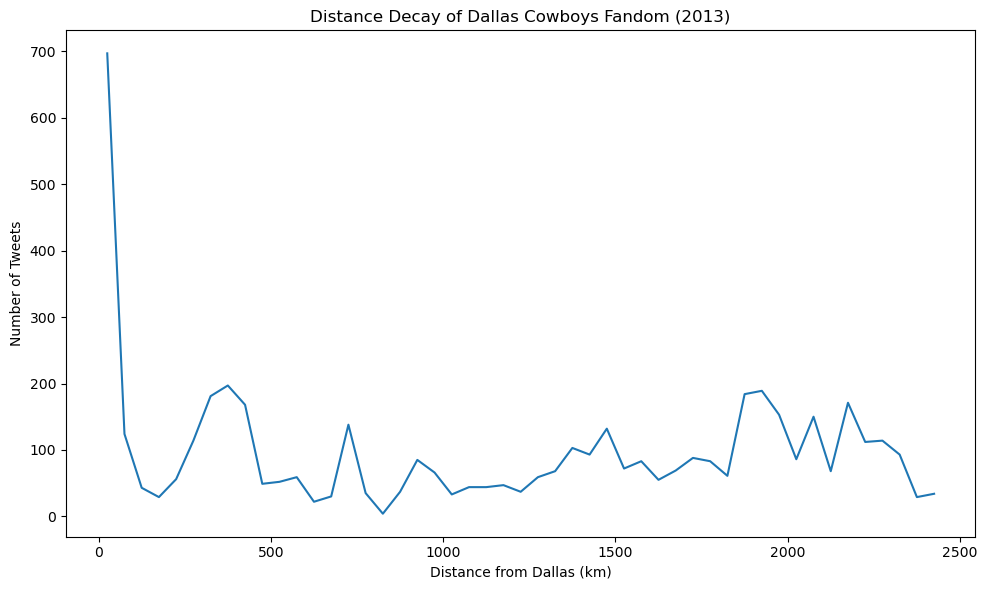

In [35]:
# radius of fandom
from shapely import Point

dallas_center = Point(-96.7970, 32.7767)

# project tweets to meters
tweets_proj = tweets_with_city.to_crs(epsg=5070)  # NAD83 / Conus Albers

dallas_proj = gpd.GeoSeries(
    [dallas_center],
    crs="EPSG:4326"
).to_crs(epsg=5070).iloc[0]

tweets_proj["distance_km"] = (
    tweets_proj.geometry.distance(dallas_proj) / 1000
)

bins = np.arange(0, 2500, 50)  # 0–2500 km in 50 km bins
tweets_proj["distance_bin"] = pd.cut(
    tweets_proj["distance_km"], bins=bins
)

distance_counts = (
    tweets_proj
    .groupby("distance_bin")
    .size()
    .reset_index(name="tweet_count")
)

# Get bin midpoints for plotting
distance_counts["bin_mid_km"] = (
    distance_counts["distance_bin"]
    .apply(lambda x: x.mid)
    .astype(float)
)


plt.figure(figsize=(10,6))
plt.plot(
    distance_counts["bin_mid_km"],
    distance_counts["tweet_count"]
)
plt.xlabel("Distance from Dallas (km)")
plt.ylabel("Number of Tweets")
plt.title("Distance Decay of Dallas Cowboys Fandom (2013)")
plt.show()



In [36]:
background_threshold = 1500

baseline = distance_counts[
    distance_counts["bin_mid_km"] > 1500
]["tweet_count"].mean()

radius_bg = distance_counts[
    distance_counts["tweet_count"] <= baseline
]["bin_mid_km"].iloc[0]

radius_bg

np.float64(125.0)

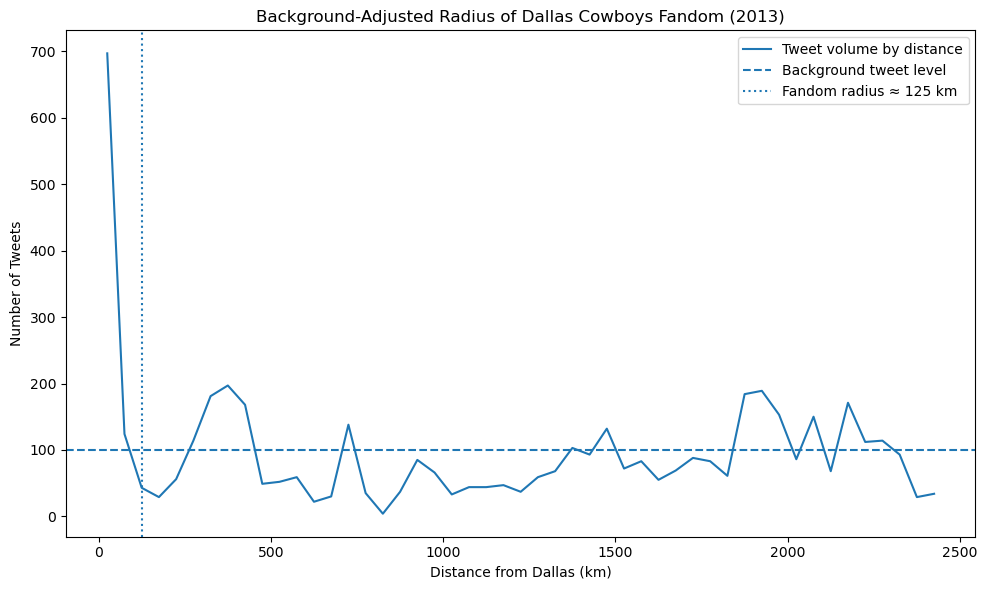

In [37]:
plt.figure(figsize=(10,6))

# Distance decay curve
plt.plot(
    distance_counts["bin_mid_km"],
    distance_counts["tweet_count"],
    label="Tweet volume by distance"
)

# Background noise line
plt.axhline(
    y=baseline,
    linestyle="--",
    label="Background tweet level"
)

# Radius of fandom
plt.axvline(
    x=radius_bg,
    linestyle=":",
    label=f"Fandom radius ≈ {int(radius_bg)} km"
)

plt.xlabel("Distance from Dallas (km)")
plt.ylabel("Number of Tweets")
plt.title("Background-Adjusted Radius of Dallas Cowboys Fandom (2013)")
plt.legend()
plt.tight_layout()
plt.show()


In [38]:
# Dallas center (lat, lon)
dallas_lat = 32.7767
dallas_lon = -96.7970

R_km = radius_bg  # background-adjusted fandom radius

def geodesic_circle(lat, lon, radius_km, n_points=360):
    earth_radius_km = 6371.0
    angles = np.linspace(0, 2*np.pi, n_points)

    lat_rad = np.radians(lat)
    lon_rad = np.radians(lon)

    circle_lats = np.arcsin(
        np.sin(lat_rad) * np.cos(radius_km / earth_radius_km) +
        np.cos(lat_rad) * np.sin(radius_km / earth_radius_km) * np.cos(angles)
    )

    circle_lons = lon_rad + np.arctan2(
        np.sin(angles) * np.sin(radius_km / earth_radius_km) * np.cos(lat_rad),
        np.cos(radius_km / earth_radius_km) -
        np.sin(lat_rad) * np.sin(circle_lats)
    )

    return np.degrees(circle_lats), np.degrees(circle_lons)


circle_lat, circle_lon = geodesic_circle(
    dallas_lat, dallas_lon, R_km
)
metro_summary = tweets_with_city.groupby('NAME').agg({
    'id': 'count',
    'lat': 'mean',
    'lon': 'mean'
}).reset_index()

metro_summary = metro_summary.rename(columns={'id': 'count'})
metro_summary = metro_summary[metro_summary['count'] >= 10]

fig = px.scatter_geo(
    metro_summary,
    lat="lat",
    lon="lon",
    size="count",
    hover_name="NAME",
    hover_data={"count": True, "lat": False, "lon": False},
    title="Geographic Radius of Dallas Cowboys Fandom (2013)",
    scope="usa"
)


fig.add_trace(
    px.line_geo(
        lat=circle_lat,
        lon=circle_lon
    ).data[0]
)

fig.data[-1].update(
    line=dict(width=3, dash="dash"),
    name=f"Fandom radius ≈ {int(R_km)} km",
    showlegend=True
)

fig.add_trace(
    px.scatter_geo(
        lat=[dallas_lat],
        lon=[dallas_lon]
    ).data[0]
)

fig.data[-1].update(
    marker=dict(size=12),
    name="Dallas"
)

fig.update_geos(
    scope="usa",
    showland=True,
    landcolor="lightgray",
    showocean=True,
    oceancolor="azure",
    showlakes=True,
    lakecolor="azure",
    showrivers=True,
    rivercolor="azure"
)

fig.update_layout(
    title_x=0.5,
    title_font_size=20,
    geo=dict(
        bgcolor='rgba(0,0,0,0)',
        landcolor='lightgray',
        lakecolor='azure'
    )
)

fig.show()

